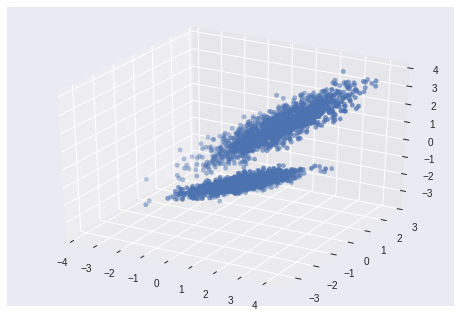

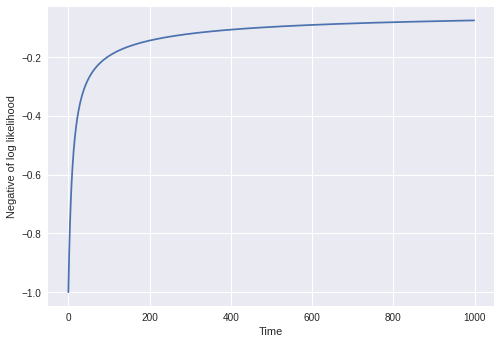

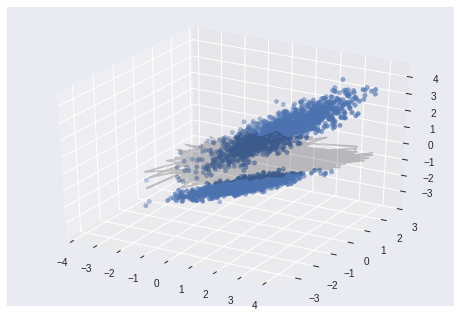

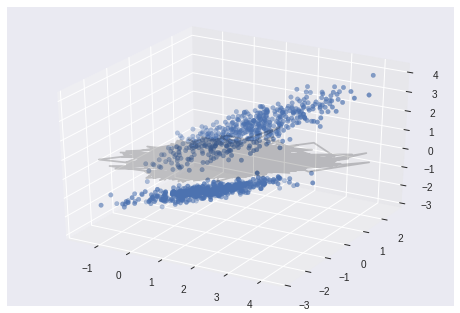

[-2.30803906  1.5512357  -2.32827128] -1.798877446541916


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from mpl_toolkits import mplot3d

dfx=pd.read_csv('/content/Logistic_X_Train.csv')
dfy=pd.read_csv('/content/Logistic_Y_Train.csv')

f1=dfx[['f1']].values
f2=dfx[['f2']].values
f3=dfx[['f3']].values
x=f1
x=np.hstack((f1,f2))
x=np.hstack((x,f3))

f1=f1.reshape((-1,))
f2=f2.reshape((-1,))
f3=f3.reshape((-1,))

y=dfy[['label']].values
y=y.reshape((-1,))

fig=plt.figure()
ax=plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
plt.show()

def hypothesis(x,w,b):
  hx=np.dot(x,w)+b
  return sigmoid(hx)

def sigmoid(z):
  return 1.0/(1.0+np.exp(-1.0*z))

def error(x,y,w,b):
  err=0.0
  m=x.shape[0]

  for i in range (m):
    hx=hypothesis(x[i],w,b)
    err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)

  return err/m

def gradient(x,y,w,b):
  grad_b=0.0
  grad_w=np.zeros(w.shape)
  m=x.shape[0]

  for i in range(m):
    hx=hypothesis(x[i],w,b)
    grad_b+=y[i]-hx
    grad_w+=((y[i]-hx)*x[i])

  return [grad_b/m,grad_w/m]

def gradient_ascent(x,y,w,b,learning_rate=0.1):
  err=error(x,y,w,b)
  [grad_b,grad_w]=gradient(x,y,w,b)
  w+=learning_rate*grad_w
  b+=learning_rate*grad_b
  return err,w,b

loss=[]

w=np.zeros((x.shape[1],))
b=0

for i in range(1000):
  l,W,b=gradient_ascent(x,y,w,b)
  loss.append(l)

plt.plot(loss)
plt.ylabel('Negative of log likelihood')
plt.xlabel('Time')
plt.show()

X_test=pd.read_csv('/content/Logistic_X_Test.csv')
f1_test = X_test[['f1']].values
f2_test = X_test[['f2']].values
f3_test = X_test[['f3']].values

f1_test = f1_test.reshape((-1,))
f2_test = f2_test.reshape((-1,))
f3_test = f3_test.reshape((-1,))

#Trainging Data

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
#plt.show()

xt = f2
yt = f3
zt = -((W[1]*xt + W[2]*yt + b)/W[0])

ax.plot3D(xt,yt,zt,color = 'k',alpha = 0.2)
plt.show()

#Testing Data

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2_test,f3_test,f1_test,  cmap='hsv')
#plt.show()

xt = f2_test
yt = f3_test
zt = (-(W[1]*xt + W[2]*yt + b)/W[0])

ax.plot3D(xt,yt,zt,color = 'k',alpha = 0.2)
plt.show()




print(W,b)






